# Import Libraries

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import collections
from collections import Counter
from numpy.linalg import matrix_power 
import itertools
import random
import sys
%matplotlib inline
from random import uniform, seed
import time

# Question 4

In [ ]:
fin = open("friendship-data.txt", "rt")
fout = open("out.txt", "wt")
for line in fin:
  fout.write(line.replace('\t', ','))
fin.close()
fout.close()

In [ ]:
G = nx.read_adjlist('out.txt', delimiter=',',create_using=nx.DiGraph(), )
print(nx.info(G))


DiGraph with 49996 nodes and 662467 edges


In [ ]:
degrees = G.degree()
sum_of_edges = sum(dict(degrees).values())
number_of_nodes = G.number_of_nodes()
avg_degree = sum_of_edges / number_of_nodes
avg_degree/2

13.25040003200256

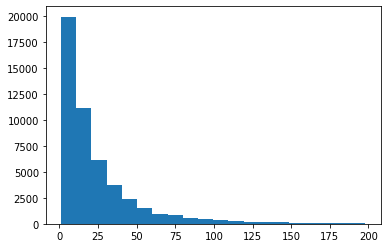

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degrees = list(filter(lambda x: x < 200, degrees))
    plt.hist(degrees, bins =20)
    plt.show()

plot_degree_dist(G)

In [ ]:
my_map = nx.pagerank_alg.pagerank(G)
inv_map = {v: k for k, v in my_map.items()}

In [ ]:
keys1 = list(inv_map.keys())
keys1.sort()

In [ ]:
keys1[:10]

[3.038531698427423e-06,
 3.3057977550637216e-06,
 3.634700345966363e-06,
 3.649460944271241e-06,
 3.651201691007553e-06,
 3.652187192673742e-06,
 3.654876336247088e-06,
 3.657340770562175e-06,
 3.66102230726546e-06,
 3.6625583655373513e-06]

In [ ]:
[inv_map[x] for x in keys1[:10]]

['49999',
 '31653',
 '34655',
 '34788',
 '34186',
 '34180',
 '34193',
 '34562',
 '13163',
 '34804']

# Question 1

In [ ]:
mat = scipy.io.loadmat('facebook101_princton_weighted.mat')


In [ ]:
G = nx.from_scipy_sparse_matrix(mat['A'])

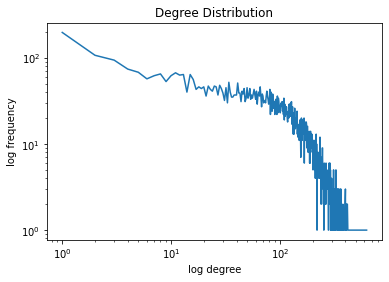

In [ ]:
degs = {}
for n in G.nodes():
  deg = G.degree(n) 
  if deg not in degs:
    degs[deg] = 0 
  degs[deg] += 1
items = sorted(degs.items())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xlabel("log degree")
ax.set_ylabel("log frequency")
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("Degree Distribution")
plt.show()

In [ ]:
adj_mat = nx.to_numpy_matrix(G, weight=None)
res = matrix_power(adj_mat, 7) 
paths_with_sevlen = np.sum(res)/2
paths_with_sevlen

6.128511995623708e+18

In [ ]:
def graph_diameter(G):
    diams = []
    components  = (G.subgraph(c).copy() for c in nx.connected_components(G))
    for c in components:
        diams.append(nx.diameter(c))

    return diams 

In [ ]:
print(graph_diameter(G))

[9, 1, 2, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
adj_mat = nx.to_numpy_matrix(G, weight=None)
a3 = matrix_power(adj_mat, 3) 

K3 = np.trace(a3)/6

a2 =  matrix_power(adj_mat, 2)
tmp = np.sum(a2)
W = (tmp - 6 * K3) / 2

cc = 6 * K3 / W
cc

0.389058453724767

In [ ]:
components  = (G.subgraph(c).copy() for c in nx.connected_components(G))
cc_lens = []
for c in components:
  cc_lens.append(c.number_of_nodes())
print(len(cc_lens))
cc_lens.sort(reverse=True)
print(cc_lens [:5])


10
[6575, 3, 3, 3, 2]


# Question 2

In [ ]:
Gnp = nx.generators.random_graphs.fast_gnp_random_graph(6596, 0.02)

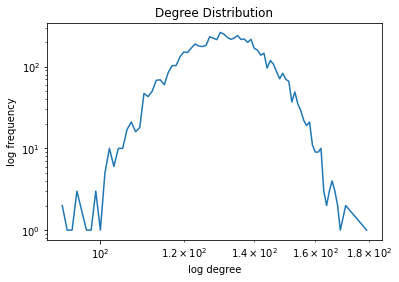

In [ ]:
degs = {}
for n in Gnp.nodes():
  deg = Gnp.degree(n) 
  if deg not in degs:
    degs[deg] = 0 
  degs[deg] += 1
items = sorted(degs.items())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xlabel("log degree")
ax.set_ylabel("log frequency")
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("Degree Distribution")
plt.show()

In [ ]:
adj_mat = nx.to_numpy_matrix(Gnp, weight=None)
res = matrix_power(adj_mat, 7) 
paths_with_sevlen = np.sum(res)/2
paths_with_sevlen

2.3848207551288253e+18

In [ ]:
print(nx.is_connected(Gnp))

True


In [ ]:
print(nx.diameter(Gnp))

3


In [ ]:
adj_mat = nx.to_numpy_matrix(Gnp, weight=None)
a3 = matrix_power(adj_mat, 3) 

K3 = np.trace(a3)/6

a2 =  matrix_power(adj_mat, 2)
tmp = np.sum(a2)
W = (tmp - 6 * K3) / 2

cc = 6 * K3 / W
cc

0.040456267943314195

In [ ]:
components  = (G.subgraph(c).copy() for c in nx.connected_components(Gnp))
cc_lens = []
for c in components:
  cc_lens.append(c.number_of_nodes())

print(len(cc_lens))
cc_lens.sort(reverse=True)
print(cc_lens [:5])


1
[6596]


# Question 5

In [10]:
def change_MAT_to_TXT(input_file, output_file):
    mat = scipy.io.loadmat(input_file)
    A = mat.__getitem__('A')
    file = open(output_file, 'w')
    for i in range(A.shape[0]):
        for j in A[i].nonzero()[1]:
            file.write(str(i) + ' ' + str(j) + ' ' + str(A[i, j]) + '\n')
    file.close()

In [ ]:
def build_matrix(dataset, size_matrix):
    result = np.zeros([size_matrix, size_matrix])
    A = open(dataset, encoding='utf-8')
    for line in A:
        text = line.split()
        result[int(text[0]), int(text[1])] = 1
    return result

In [22]:
input_file = 'facebook101_princton_weighted.mat'
txt_input_file = 'faceook101.txt'
change_MAT_to_TXT(input_file, txt_input_file)
num_node = 6596
adjacency_matrix = build_matrix(txt_input_file, num_node)

In [23]:
def build_probable_matrices(adjacency_matrix, num_realization, p):
    list_m = []
    for x in range(num_realization):
        temp = np.array(adjacency_matrix)
        for i in range(num_node):
            indexes = np.nonzero(temp[i])
            for j in indexes[0]:
                if j>= i :
                    temp[i, j] = np.random.uniform(0, 1, 1)[0] < p
                    temp[j,i] = temp[i,j]
        list_m.append(temp)
    return list_m

In [24]:
num_realization = 10
list_realization = build_probable_matrices(adjacency_matrix, num_realization, p=0.1)

In [25]:
def get_neighbor(g, node):
    return np.nonzero(g[node])[0]

In [26]:
def IC_opt(list_g, S):
    score = 0
    for g in list_g:
        neighbor = []
        for s in S:
            neighbor.extend(np.nonzero(g[s])[0])
        score += len(list(set(neighbor)))
    score /= len(list_g)
    return score

In [27]:
def greedy_hill_climbing(g, k):
    S, spread = [], []
    kprime = min(k, num_node)
    for o in range(kprime):
        best_spread = 0
        for j in set(range(num_node)) - set(S):
            s = IC_opt(g, S + [j])
            if s >= best_spread:
                best_spread, node = s, j
        S.append(node)
        spread.append(best_spread)
    return S, spread

In [28]:
size_S = 10

In [29]:
greedy_hill_climbing_output = greedy_hill_climbing(list_realization, size_S)
print(str(greedy_hill_climbing_output[0]))

[412, 4894, 6068, 41, 5, 2259, 1195, 1232, 957, 606]


In [34]:
def lazy_hill_climbing(g, k):
    marg_gain = [IC_opt(g, [node]) for node in range(num_node)]
    Q = sorted(zip(range(num_node), marg_gain), key=lambda x: x[1], reverse=True)
    S,s, SPREAD = [Q[0][0]],Q[0][1], [Q[0][1]]
    Q = Q[1:]
    kprime = min(k, num_node)
    for o in range(1, kprime):
        check = False
        while not check:
            current = Q[0][0]
            Q[0] = (current, IC_opt(g, S + [current])-s)
            Q = sorted(Q, key=lambda x: x[1], reverse=True)
            check = (Q[0][0] == current)
        S.append(Q[0][0])
        s += Q[0][1]
        SPREAD.append(s)
        Q = Q[1:]
    return S, SPREAD

In [35]:
lazy_hill_climbing_output = lazy_hill_climbing(list_realization, size_S)
print(str(lazy_hill_climbing_output[0]))


[412, 4894, 6068, 41, 5, 2259, 1195, 1232, 957, 606]


# Question 6

In [1]:
def build_matrix(dataset, size_matrix):
    result = np.zeros([size_matrix, size_matrix])
    A = open(dataset, encoding='utf-8')
    for line in A:
        text = line.split()
        result[int(text[0]), int(text[1])] = abs(float(text[2]))
    return result


def build_probable_matrices(adjacency_matrix, mc, p):
    list_m = []
    for x in range(mc):
        temp = np.array(adjacency_matrix)
        for i in range(num_node):
            indexes = np.nonzero(temp[i])
            for j in indexes[0]:
                if j >= i :
                    temp[i, j] = np.random.uniform(0, 1, 1)[0] < p
                    temp[j,i] = temp[i,j]
        list_m.append(temp)
    return list_m

In [2]:
def get_neighbor(g, node):
    neighbor = np.nonzero(g[node])
    if not neighbor: return []
    return np.nonzero(g[node])[0]

In [3]:
def IC_opt(list_g, S):
    score = 0
    for g in list_g:
        neighbor = []
        for s in S:
            neighbor.extend(get_neighbor(g,s))
        score += len(list(set(neighbor)))
    score /= len(list_g)
    return score

In [4]:
def cost(S, list_g):
    temp = []
    for s in S:
        temp.append(adjacency_matrix[s])
    temp = np.array(temp)
    cost = 0
    for g in list_g:
        temp1 = []
        for s in S:
            temp1.append(g[s])
        temp1 = np.array(temp1)
        temp2 = np.multiply(temp1, temp)
        cost += sum(sum(temp2))
    if cost == 0: cost += 1
    return cost / len(list_g)



In [5]:
def lazy_hill_climbing(g, unitCost_or_benefitRatio):
    global save_IC
    if unitCost_or_benefitRatio:
        marg_gain = [IC_opt(g, [node]) for node in range(num_node)]
        save_IC = marg_gain
    else:
        marg_gain = [save_IC[node] / cost([node], g) for node in range(num_node)]
    Q = sorted(zip(range(num_node), marg_gain), key=lambda x: x[1], reverse=True)
    S , s = [Q[0][0]] , Q[0][1]
    c = cost(S,g)
    if not unitCost_or_benefitRatio :
        SPREAD = c
    else : SPREAD = 1
    SPREAD = SPREAD * Q[0][1]
    Q = Q[1:]
    flag = True
    counter_s = 1
    while flag:
        check = False
        while not check:
            current = Q[0][0]
            if unitCost_or_benefitRatio:
                Q[0] = (current, IC_opt(g, S + [current])-s)
            else:
                Q[0] = (current, (IC_opt(g, S + [current]) / cost(S + [current], g))-s)
            Q = sorted(Q, key=lambda x: x[1], reverse=True)
            check = (Q[0][0] == current)
        c = cost(S + [Q[0][0]], g)
        temp = Q[0][1]
        temp+=s
        if unitCost_or_benefitRatio:
            temp /= c
        if 0.3 * (temp) > 1:
            SPREAD = temp * c
            s+= Q[0][1]
            S.append(Q[0][0])
            counter_s += 1
            Q = Q[1:]
        else:
            NSPREAD = temp * c
            flag = False
    return S, SPREAD



In [18]:
def CELF(g):
    S_unit, SPREAD_unit = lazy_hill_climbing(g, True)
    S_benefit, SPREAD_benefit = lazy_hill_climbing(g, False)
    if SPREAD_benefit > SPREAD_unit:
        S = S_benefit
        spread = SPREAD_benefit
    else:
        S = S_unit
        spread = SPREAD_unit
    return S, spread


In [33]:
input_file = 'facebook101_princton_weighted.mat'
txt_input_file = 'faceook101.txt'
change_MAT_to_TXT(input_file, txt_input_file)
num_node = 6596
adjacency_matrix = build_matrix(txt_input_file, num_node)

KeyboardInterrupt: ignored

In [14]:
num_realization = 10
list_realization = build_probable_matrices(adjacency_matrix, mc=num_realization, p=0.1)

In [19]:
save_IC = []
S, spread = CELF(list_realization)
print("outbreak detects by =  " + str(S))
print("mean spread value = " + str(spread))

outbreak detects by =  [2889, 372, 478, 492, 551, 624, 646, 661, 754, 755, 765, 855, 890, 1036, 1046, 1116, 1241, 1264, 1443, 1540, 1557, 1634, 1677, 1722, 1789, 1808, 1835, 1930, 2007, 2030, 2122, 2257, 2367, 2397, 2407, 2476, 2478, 2502, 2517, 2520, 2532, 2624, 2689, 2822, 2859, 2871, 2943, 3093, 3109, 3177, 3253, 3366, 3440, 3450, 3493, 3528, 3639, 3664, 3733, 3888, 3897, 4129, 4135, 4303, 4320, 4389, 4407, 4565, 4581, 4629, 4668, 4697, 4773, 4993, 4999, 5024, 5069, 5191, 5251, 5290, 5411, 5416, 5419, 5442, 5588, 5675, 5767, 5808, 5810, 5820, 5850, 5874, 6022, 6033, 6145, 6343, 6356, 6360, 6460, 6527, 556, 2378, 675, 1269, 4853, 5720, 5744, 4909, 3902, 5120, 4089, 1871, 5775, 1381, 2799, 126, 4227, 1064, 5985, 2184, 3663, 6365, 2885, 1040, 6063, 5614, 4749, 980, 2710, 1758, 2443, 357, 4741, 1396, 3302, 5061, 3217, 6255, 3752, 5700, 3967, 3018, 1027, 4082, 1819, 2186, 2475, 369, 4468, 4458, 4767, 1346, 2645, 5301, 5098, 4433, 4241, 3747, 664, 4021, 4428, 2715, 3795, 3955, 5996, 5730,